### Importing Libraries

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import re
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

### Data Extraction

In [76]:
# specify the directory containing the text files
directory = 'C:/Users/EnrolmentNumber/CrimeData/'

# create an empty dataframe
df = pd.DataFrame()

# get a list of all text files in the directory
file_list = glob.glob(directory + '*.csv')

# iterate over the list of files and read each file as a dataframe
# using the pandas read_csv function
for file in file_list:
    df_temp = pd.read_csv(file)
    df = df.append(df_temp)

# print the resulting dataframe
df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,6532da423574d1fd5cc87e7b98704dd12ed815c201da6e...,2020-01,South Wales Police,South Wales Police,-3.185528,51.797576,On or near Twyncynghordy Place,W01001447,Blaenau Gwent 002B,Violence and sexual offences,Unable to prosecute suspect,NaN
1,NaN,2020-01,South Wales Police,South Wales Police,-3.659680,51.639072,On or near Heol Ceulanydd,W01000991,Bridgend 001A,Anti-social behaviour,NaN,NaN
2,NaN,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,W01000991,Bridgend 001A,Anti-social behaviour,NaN,NaN
3,494315b76054c502507bcd8a015c3cdb5699d97930d06c...,2020-01,South Wales Police,South Wales Police,-3.649808,51.638618,On or near North Street,W01000991,Bridgend 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
4,a7e3965c665ba05041095563465ad631de033b93e14d99...,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,W01000991,Bridgend 001A,Public order,Unable to prosecute suspect,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11631,77bee93c08ce13ae23951cc37a7dcca30083f81e6e4e4e...,2022-10,South Wales Police,South Wales Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
11632,76da4bae7f7f0e4bcb591f762aae5d7fc759af81a904f6...,2022-10,South Wales Police,South Wales Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
11633,0b33322ee294a4cde28d2b079941c670b2347cda080239...,2022-10,South Wales Police,South Wales Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
11634,5cddc839270530767b0e935bbbd6c0f1800c2f52f7bf9f...,2022-10,South Wales Police,South Wales Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN


In [77]:
# Information about data types and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402794 entries, 0 to 11635
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               295564 non-null  object 
 1   Month                  402794 non-null  object 
 2   Reported by            402794 non-null  object 
 3   Falls within           402794 non-null  object 
 4   Longitude              392372 non-null  float64
 5   Latitude               392372 non-null  float64
 6   Location               402794 non-null  object 
 7   LSOA code              392372 non-null  object 
 8   LSOA name              392372 non-null  object 
 9   Crime type             402794 non-null  object 
 10  Last outcome category  295564 non-null  object 
 11  Context                0 non-null       float64
dtypes: float64(3), object(9)
memory usage: 39.9+ MB


### Data Cleaning and Transformation

In [78]:
# Drop redundant columns
crime_df = df.drop(['Crime ID', 'Falls within', 'LSOA code', 'LSOA name', 'Context'], axis=1)
crime_df

,Month,Reported by,Longitude,Latitude,Location,Crime type,Last outcome category
0,2020-01,South Wales Police,-3.185528,51.797576,On or near Twyncynghordy Place,Violence and sexual offences,Unable to prosecute suspect
1,2020-01,South Wales Police,-3.659680,51.639072,On or near Heol Ceulanydd,Anti-social behaviour,NaN
2,2020-01,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Anti-social behaviour,NaN
3,2020-01,South Wales Police,-3.649808,51.638618,On or near North Street,Criminal damage and arson,Investigation complete; no suspect identified
4,2020-01,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Public order,Unable to prosecute suspect
...,...,...,...,...,...,...,...
11631,2022-10,South Wales Police,NaN,NaN,No Location,Other crime,Under investigation
11632,2022-10,South Wales Police,NaN,NaN,No Location,Other crime,Under investigation
11633,2022-10,South Wales Police,NaN,NaN,No Location,Other crime,Under investigation
11634,2022-10,South Wales Police,NaN,NaN,No Location,Other crime,Under investigation


In [79]:
# Change month column to datetime
crime_df['Month'] =  pd.to_datetime(crime_df['Month'])
crime_df = crime_df.set_index('Month')
crime_df

,Reported by,Longitude,Latitude,Location,Crime type,Last outcome category
Month,,,,,,
2020-01-01,South Wales Police,-3.185528,51.797576,On or near Twyncynghordy Place,Violence and sexual offences,Unable to prosecute suspect
2020-01-01,South Wales Police,-3.659680,51.639072,On or near Heol Ceulanydd,Anti-social behaviour,NaN
2020-01-01,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Anti-social behaviour,NaN
2020-01-01,South Wales Police,-3.649808,51.638618,On or near North Street,Criminal damage and arson,Investigation complete; no suspect identified
2020-01-01,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Public order,Unable to prosecute suspect
...,...,...,...,...,...,...
2022-10-01,South Wales Police,NaN,NaN,No Location,Other crime,Under investigation
2022-10-01,South Wales Police,NaN,NaN,No Location,Other crime,Under investigation
2022-10-01,South Wales Police,NaN,NaN,No Location,Other crime,Under investigation


### Data Analysis

In [16]:
print('Total reported crimes:', crime_df.shape[0])
print('\n')
print('The crimes are sub divided into the following categories:', '\n',  crime_df['Crime type'].value_counts())
print('\n')
print('Top 10 locations by order in which crime is committed:', '\n', crime_df['Location'].value_counts().head(10))
print('\n')
print('Status of the crimes:', '\n', crime_df['Last outcome category'].value_counts())

Total reported crimes: 288297


The crimes are sub divided into the following categories: 
 Violence and sexual offences    118735
Public order                     39989
Criminal damage and arson        31497
Other theft                      20805
Shoplifting                      19577
Vehicle crime                    17076
Burglary                         12907
Drugs                            11991
Other crime                       5787
Bicycle theft                     4365
Theft from the person             2229
Possession of weapons             1932
Robbery                           1407
Name: Crime type, dtype: int64


Top 10 locations by order in which crime is committed: 
 On or near Parking Area              8022
On or near Supermarket               6670
On or near Shopping Area             6655
On or near                           5808
On or near Sports/Recreation Area    5467
On or near Pedestrian Subway         3382
On or near Petrol Station            3314
On or near Nightc

In [80]:
# Dropping null rows
crime_df = crime_df.dropna()
crime_df

,Reported by,Longitude,Latitude,Location,Crime type,Last outcome category
Month,,,,,,
2020-01-01,South Wales Police,-3.185528,51.797576,On or near Twyncynghordy Place,Violence and sexual offences,Unable to prosecute suspect
2020-01-01,South Wales Police,-3.649808,51.638618,On or near North Street,Criminal damage and arson,Investigation complete; no suspect identified
2020-01-01,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Public order,Unable to prosecute suspect
2020-01-01,South Wales Police,-3.658966,51.633363,On or near Dyffryn Road,Vehicle crime,Unable to prosecute suspect
2020-01-01,South Wales Police,-3.658966,51.633363,On or near Dyffryn Road,Vehicle crime,Investigation complete; no suspect identified
...,...,...,...,...,...,...
2022-10-01,South Wales Police,-3.262020,51.404854,On or near Castleland Street,Violence and sexual offences,Awaiting court outcome
2022-10-01,South Wales Police,-3.265182,51.400620,On or near Ffordd Y Mileniwm,Other crime,Awaiting court outcome
2022-10-01,South Wales Police,-3.046397,51.648811,On or near Byways,Other crime,Under investigation


### Crime by Crime Type

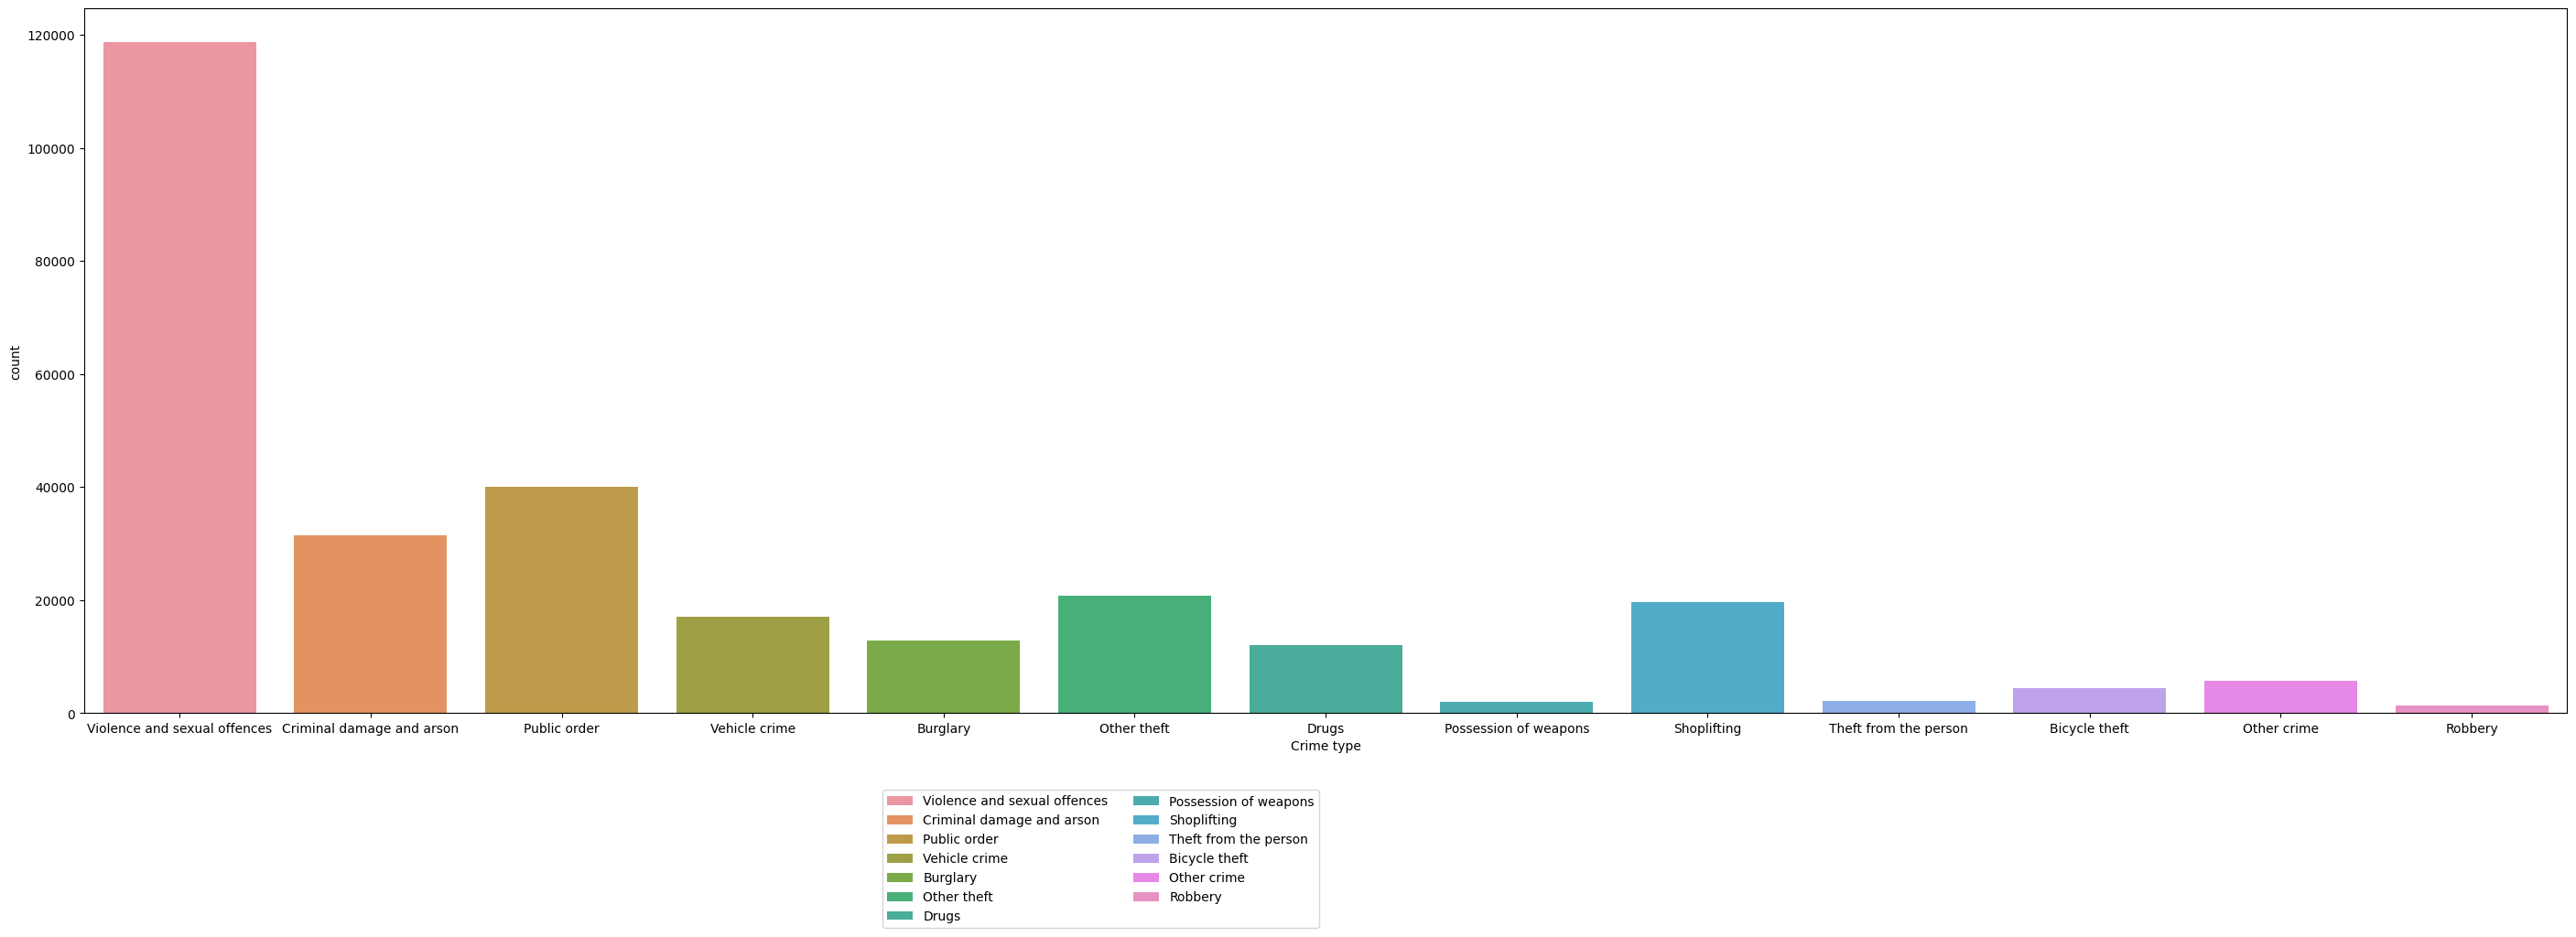

In [7]:
plt.figure(figsize=(35,10))
sns.countplot(x='Crime type', data=crime_df, label=crime_df['Crime type'].unique())
plt.legend(bbox_to_anchor =(0.5, -0.10), ncol = 2)
plt.show()

### Crime by Location

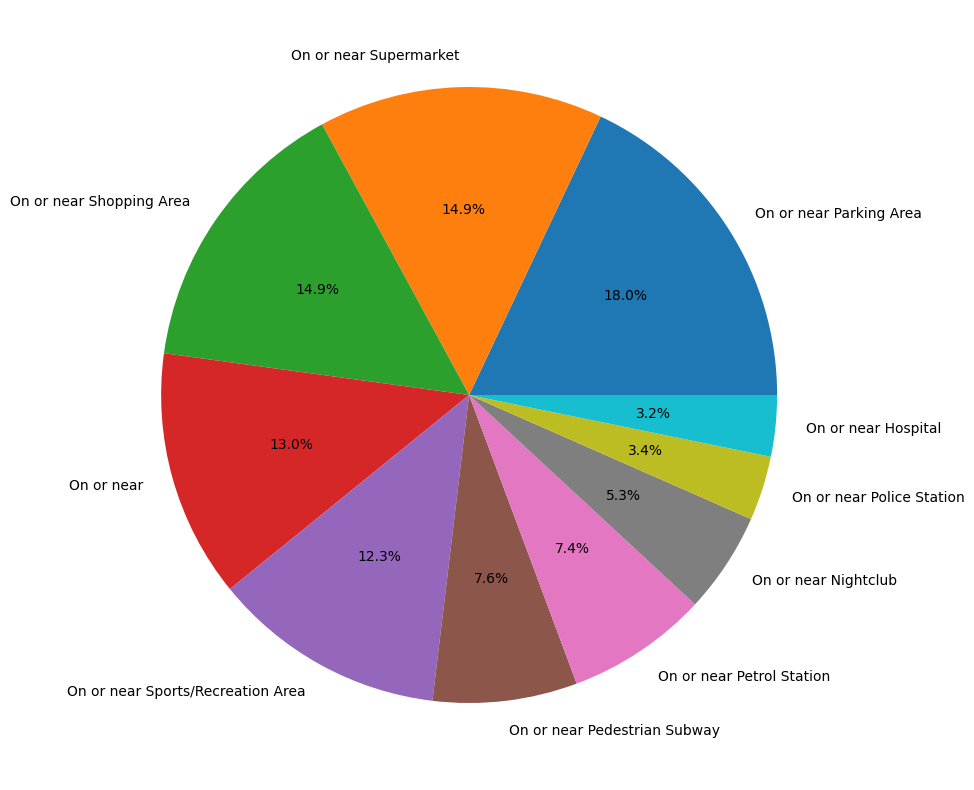

In [28]:
plt.figure(figsize=(35,10))
plt.pie(x=crime_df['Location'].value_counts().head(10), data=crime_df,  autopct='%1.1f%%', labels=['On or near Parking Area','On or near Supermarket', 'On or near Shopping Area', 'On or near','On or near Sports/Recreation Area', 'On or near Pedestrian Subway', 'On or near Petrol Station', 'On or near Nightclub', 'On or near Police Station', 'On or near Hospital']    )
plt.show()

### Crime by Crime Status

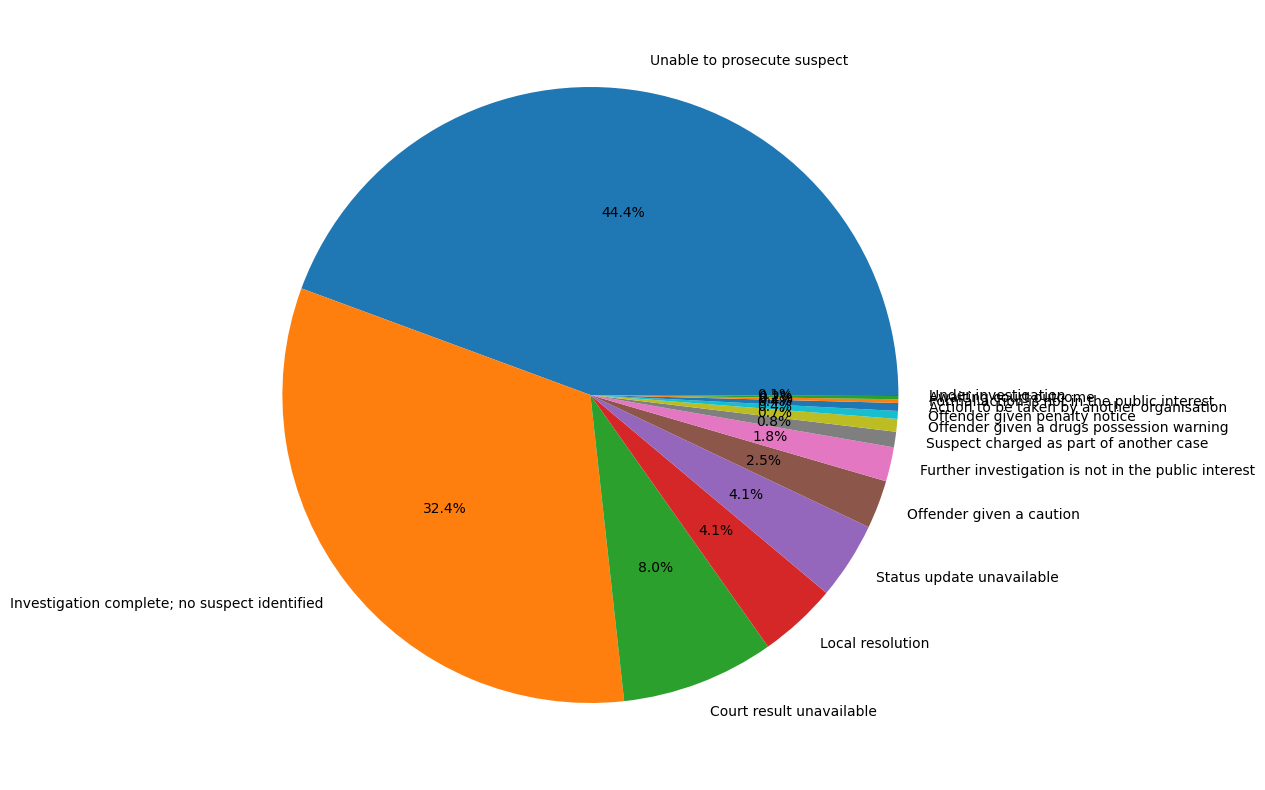

In [29]:
plt.figure(figsize=(35,10))
plt.pie(x=crime_df['Last outcome category'].value_counts(), data=crime_df,  autopct='%1.1f%%', labels=crime_df['Last outcome category'].unique())
plt.show()

In [62]:
# Extracting year and month data from date
crime_df['year'] = crime_df['Month'].dt.year
crime_df['month'] = crime_df['Month'].dt.month

### Crime by Year

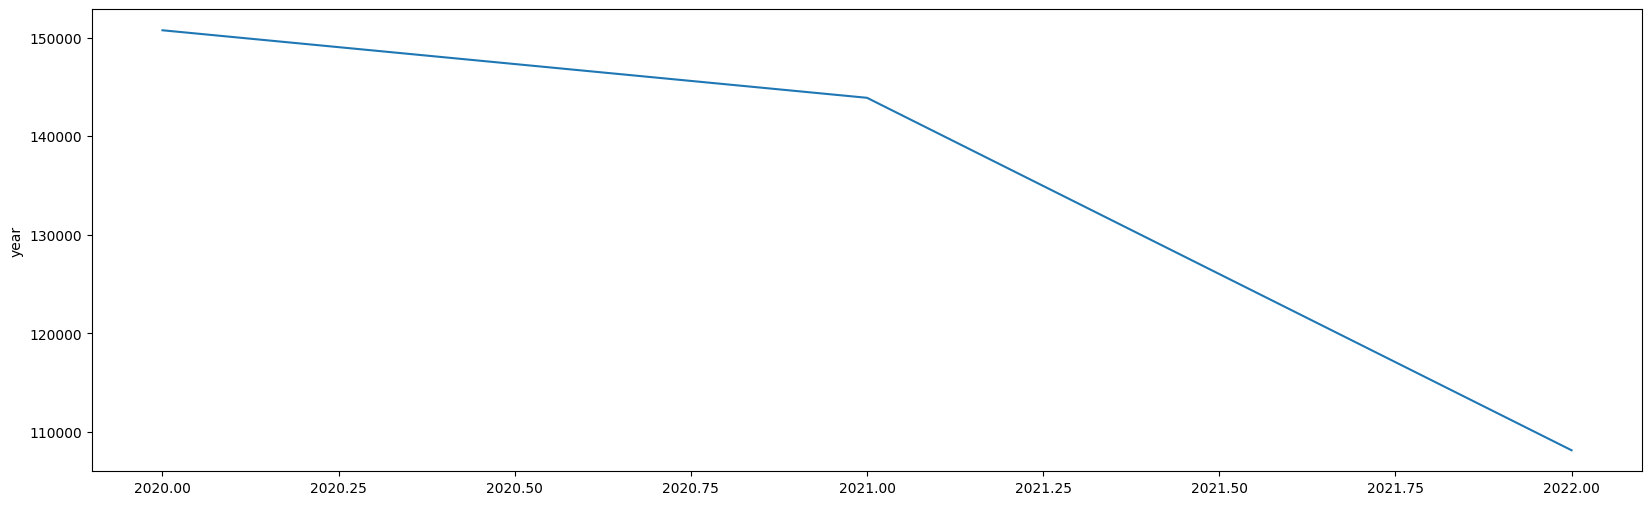

In [69]:
#visualize how Crime is defined by year.
plt.figure(figsize=(20,6))
fig = sns.lineplot(y=crime_df['year'].value_counts(), x=crime_df['year'].unique())

### Crime by Month

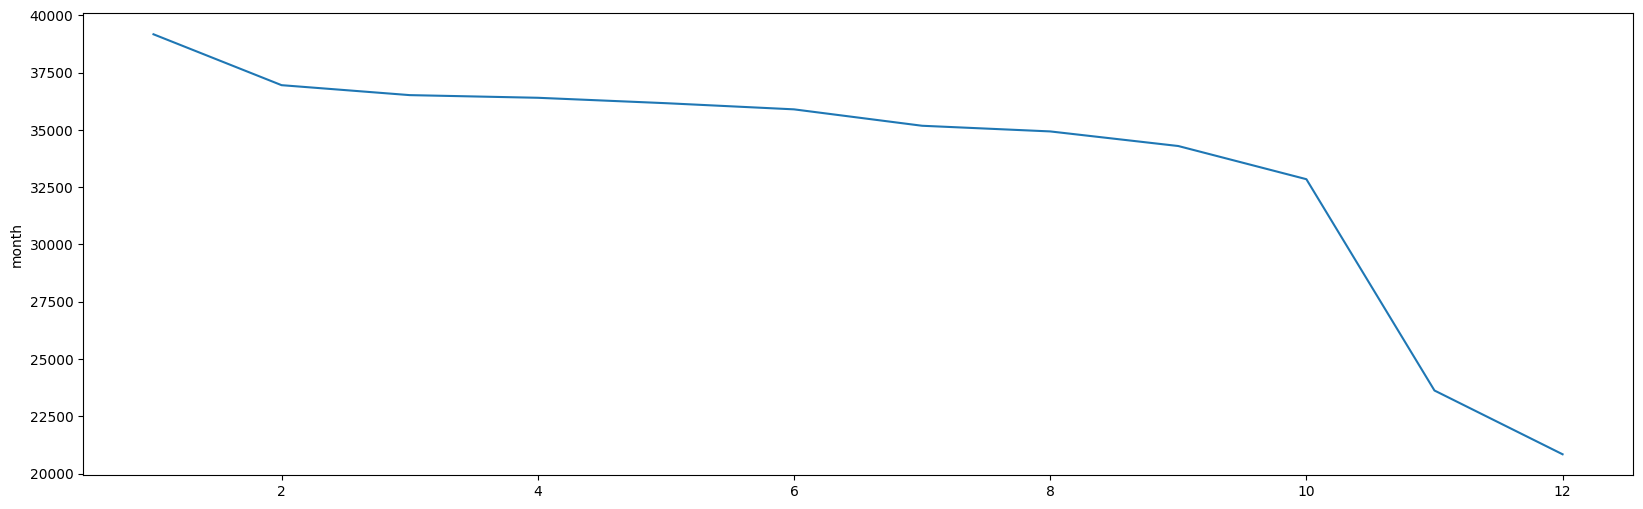

In [68]:
#visualize how Crime is defined by month.
plt.figure(figsize=(20,6))
fig = sns.lineplot(y=crime_df['month'].value_counts(), x=crime_df['month'].unique())

### Visualizing crime types by year and month

In [71]:
t1 = crime_df[crime_df['Crime type'] == 'Violence and sexual offences']
t2 = crime_df[crime_df['Crime type'] == 'Anti-social behaviour']
t3 = crime_df[crime_df['Crime type'] == 'Criminal damage and arson']
t4 = crime_df[crime_df['Crime type'] == 'Public order']
t5 = crime_df[crime_df['Crime type'] == 'Vehicle crime']
t6 = crime_df[crime_df['Crime type'] == 'Burglary']
t7 = crime_df[crime_df['Crime type'] == 'Other theft']
t8 = crime_df[crime_df['Crime type'] == 'Drugs']

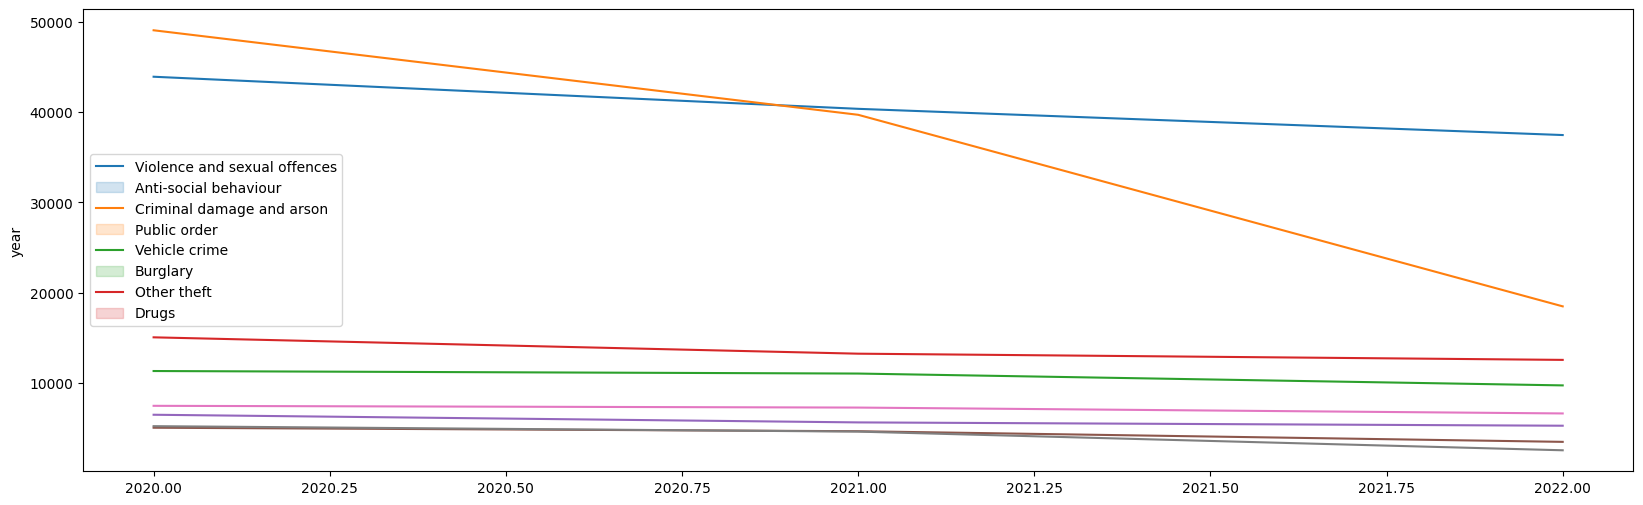

In [74]:
#visualize how Crime is defined by year.
plt.figure(figsize=(20,6))
fig = sns.lineplot(y=t1['year'].value_counts(), x=t1['year'].unique())
fig = sns.lineplot(y=t2['year'].value_counts(), x=t2['year'].unique())
fig = sns.lineplot(y=t3['year'].value_counts(), x=t3['year'].unique())
fig = sns.lineplot(y=t4['year'].value_counts(), x=t4['year'].unique())
fig = sns.lineplot(y=t5['year'].value_counts(), x=t5['year'].unique())
fig = sns.lineplot(y=t6['year'].value_counts(), x=t6['year'].unique())
fig = sns.lineplot(y=t7['year'].value_counts(), x=t7['year'].unique())
fig = sns.lineplot(y=t8['year'].value_counts(), x=t8['year'].unique())

plt.legend(['Violence and sexual offences', 'Anti-social behaviour',
       'Criminal damage and arson', 'Public order', 'Vehicle crime',
       'Burglary', 'Other theft', 'Drugs'])


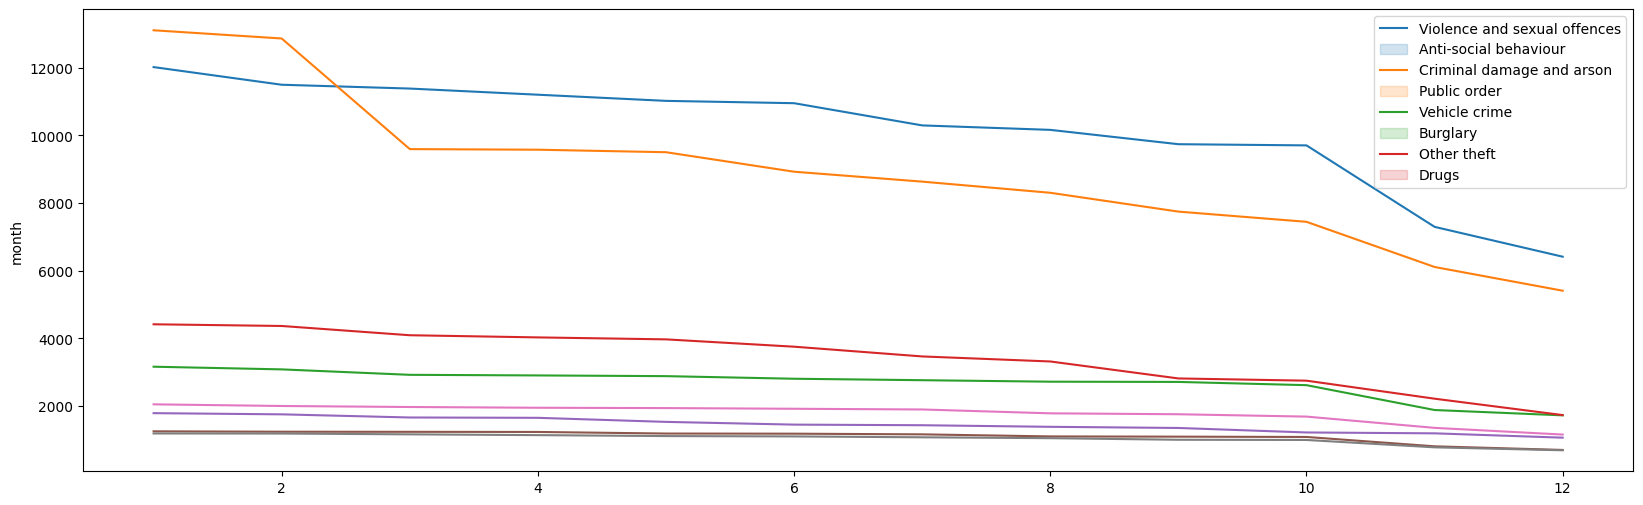

In [73]:
#visualize how Crime is defined by month.
plt.figure(figsize=(20,6))
fig = sns.lineplot(y=t1['month'].value_counts(), x=t1['month'].unique())
fig = sns.lineplot(y=t2['month'].value_counts(), x=t2['month'].unique())
fig = sns.lineplot(y=t3['month'].value_counts(), x=t3['month'].unique())
fig = sns.lineplot(y=t4['month'].value_counts(), x=t4['month'].unique())
fig = sns.lineplot(y=t5['month'].value_counts(), x=t5['month'].unique())
fig = sns.lineplot(y=t6['month'].value_counts(), x=t6['month'].unique())
fig = sns.lineplot(y=t7['month'].value_counts(), x=t7['month'].unique())
fig = sns.lineplot(y=t8['month'].value_counts(), x=t8['month'].unique())

plt.legend(['Violence and sexual offences', 'Anti-social behaviour',
       'Criminal damage and arson', 'Public order', 'Vehicle crime',
       'Burglary', 'Other theft', 'Drugs'])


### Visualizing crime hotspots on UK Map

In [52]:
!pip install Basemap

You should consider upgrading via the 'c:\users\haris\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [55]:
!pip install basemap-data-hires

You should consider upgrading via the 'c:\users\haris\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


NameError: name 'figsize' is not defined

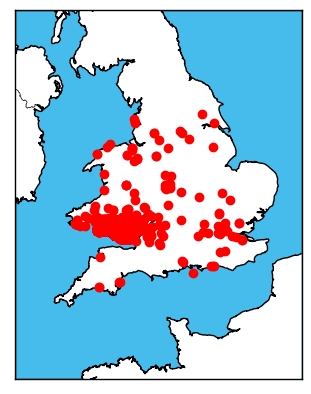

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import io


# read in data to use for plotted points
lat = crime_df['Latitude'].values
lon = crime_df['Longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
plt.figure(figsize=(6, 3))
plt.show()